### 트리

- **Node:** 트리에서 데이터를 저장하는 기본 요소 
- **Root Node:** 트리 맨 위에 있는 노드
- **Level:** 최상위 노드를 Level 0으로 하였을 때, 하위 Branch로 연결된 노드의 깊이를 나타냄
- **Parent Node:** 어떤 노드의 상위 레벨에 연결된 노드
- **Child Node:** 어떤 노드의 하위 레벨에 연결된 노드
- **Leaf Node(Terminal Node):** Child Node가 하나도 없는 노드
- **Sibling:** 동일한 Parent Node를 가진 노드
- **Depth:** 트리에서 Node가 가질 수 있는 최대 Level

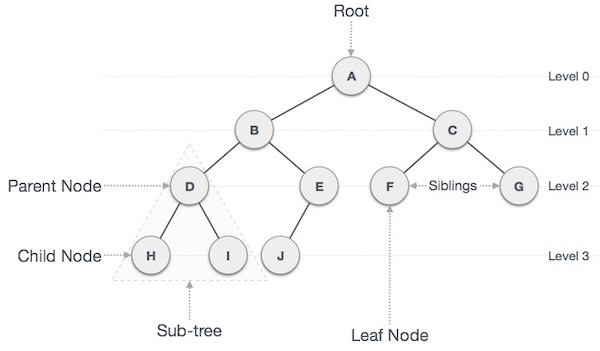

### 힙

힙은 데이터에서 최대값과 최소값을 빠르게 찾기 위해 고안된 완전 이진 트리(Complete Binary Tree)

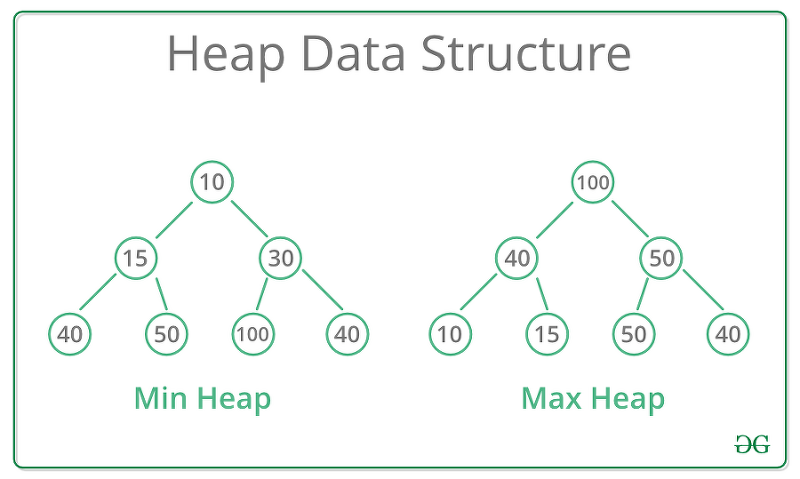

### **✍️맥스 힙에 원소 추가**

In [ ]:
class MaxHeap:
    def __init__(self):
        self.items = [None]

    def insert(self, value):
        self.items.append(value)
        child_idx = len(self.items) - 1
        while child_idx > 1:
            parent_idx = child_idx // 2
            if self.items[parent_idx] < self.items[child_idx]:
                self.items[parent_idx], self.items[child_idx] = self.items[child_idx], self.items[parent_idx]
                child_idx = parent_idx
            else:
                break
                    
        return self.items


max_heap = MaxHeap()
max_heap.insert(3)
max_heap.insert(4)
max_heap.insert(2)
max_heap.insert(9)
print(max_heap.items)  # [None, 9, 4, 2, 3] 가 출력되어야 합니다!

[None, 9, 4, 2, 3]


### **✍️맥스 힙의 원소 제거**

In [ ]:
class MaxHeap:
    def __init__(self):
        self.items = [None]

    def insert(self, value):
        self.items.append(value)
        cur_index = len(self.items) - 1

        while cur_index > 1:  # cur_index 가 1이 되면 정상을 찍은거라 다른 것과 비교 안하셔도 됩니다!
            parent_index = cur_index // 2
            if self.items[parent_index] < self.items[cur_index]:
                self.items[parent_index], self.items[cur_index] = self.items[cur_index], self.items[parent_index]
                cur_index = parent_index
            else:
                break

    def delete(self):
        to_be_del = self.items[1]
        self.items[1], self.items[-1] = self.items[-1], self.items[1]
        self.items.pop()
        current_idx = 1
        while current_idx <= len(self.items)-1:
            child_idx_left = current_idx * 2
            child_idx_right = current_idx * 2 + 1
            max_idx = current_idx
            
            if child_idx_left <= len(self.items)-1 and\
            self.items[max_idx] < self.items[child_idx_left]:
                max_idx = child_idx_left
            
            if child_idx_right <= len(self.items)-1 and\
            self.items[max_idx] < self.items[child_idx_right]:
                max_idx = child_idx_right

            if max_idx == current_idx:
                break
            
            self.items[current_idx], self.items[max_idx] = self.items[max_idx], self.items[current_idx]
            current_idx = max_idx
        return to_be_del  # 8 을 반환해야 합니다.


max_heap = MaxHeap()
max_heap.insert(8)
max_heap.insert(7)
max_heap.insert(6)
max_heap.insert(2)
max_heap.insert(5)
max_heap.insert(4)
print(max_heap.items)  # [None, 8, 7, 6, 2, 5, 4]
print(max_heap.delete())  # 8 을 반환해야 합니다!
print(max_heap.items)  # [None, 7, 5, 6, 2, 4]

[None, 8, 7, 6, 2, 5, 4]
8
[None, 7, 5, 6, 2, 4]


### **✍️ DFS 구현해보기 - 재귀함수**

![image.png](https://upload.wikimedia.org/wikipedia/commons/7/7f/Depth-First-Search.gif)

Q. 인접 리스트가 주어질 때, 모든 노드를 DFS 순서대로 방문하시오. 

In [ ]:
# 위의 그래프를 예시로 삼아서 인접 리스트 방식으로 표현했습니다!
graph = {
    1: [2, 5, 9],
    2: [1, 3],
    3: [2, 4],
    4: [3],
    5: [1, 6, 8],
    6: [5, 7],
    7: [6],
    8: [5],
    9: [1, 10],
    10: [9]
}
visited = []


def dfs_recursion(adjacent_graph, cur_node, visited_array):
    visited_array.append(cur_node)
    for adjacent_node in adjacent_graph:
        if adjacent_node not in visited_array:
            dfs_recursion(adjacent_graph, adjacent_node, visited_array)


dfs_recursion(graph, 1, visited)  # 1 이 시작노드입니다!
print(visited)  # [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 이 출력되어야 합니다!

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


### **✍️ DFS 구현해보기 - 스택**

In [ ]:
# 위의 그래프를 예시로 삼아서 인접 리스트 방식으로 표현했습니다!
graph = {
    1: [2, 5, 9],
    2: [1, 3],
    3: [2, 4],
    4: [3],
    5: [1, 6, 8],
    6: [5, 7],
    7: [6],
    8: [5],
    9: [1, 10],
    10: [9]
}


def dfs_stack(adjacent_graph, start_node):
    # 1. 시작 노드를 stack에 저장
    # 2. stack에서 제일 마지막 원소를 빼서, visited에 추가
    # 3. 인접한 노드들 중에서, 방문하지 않은 것들을 stack에 추가
    # 4. stack이 없어질 때까지 2-3을 반복
    
    stack = [start_node]
    visited = []
    while stack:
        visited.append(stack.pop())
        print(visited)
        for node in adjacent_graph[visited[-1]]:
            if node not in visited:
                stack.append(node)
    return visited


print(dfs_stack(graph, 1))  # 1 이 시작노드입니다!
# [1, 9, 10, 5, 8, 6, 7, 2, 3, 4] 이 출력되어야 합니다!

[1]
[1, 9]
[1, 9, 10]
[1, 9, 10, 5]
[1, 9, 10, 5, 8]
[1, 9, 10, 5, 8, 6]
[1, 9, 10, 5, 8, 6, 7]
[1, 9, 10, 5, 8, 6, 7, 2]
[1, 9, 10, 5, 8, 6, 7, 2, 3]
[1, 9, 10, 5, 8, 6, 7, 2, 3, 4]
[1, 9, 10, 5, 8, 6, 7, 2, 3, 4]


### **✍️ BFS 구현해보기**

![image](https://upload.wikimedia.org/wikipedia/commons/5/5d/Breadth-First-Search-Algorithm.gif)

In [ ]:
# 위의 그래프를 예시로 삼아서 인접 리스트 방식으로 표현했습니다!
graph = {
    1: [2, 3, 4],
    2: [1, 5],
    3: [1, 6, 7],
    4: [1, 8],
    5: [2, 9],
    6: [3, 10],
    7: [3],
    8: [4],
    9: [5],
    10: [6]
}


def bfs_queue(adj_graph, start_node):
    # 1. 시작 노드를 큐에 삽입
    # 2. 현재 큐의 노드를 배서 visited에 추가
    # 3. 현재 방문한 노드와 인접한
    queue = [start_node]
    visited = []

    while queue:
        visited.append(queue.pop(0))
        print(visited)
        for node in adj_graph[visited[-1]]:
            if node not in visited:
                queue.append(node)
    return visited


print(bfs_queue(graph, 1))  # 1 이 시작노드입니다!
# [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 이 출력되어야 합니다!

[1]
[1, 2]
[1, 2, 3]
[1, 2, 3, 4]
[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6, 7]
[1, 2, 3, 4, 5, 6, 7, 8]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


### **✍️ 피보나치 수열 - 재귀함수**

Q. 피보나치 수열의 20번째 수를 구하시오.

In [ ]:
input = 20


def fibo_recursion(n):
    if n >= 3:
        result = fibo_recursion(n-1) + fibo_recursion(n-2)
    else:
        result = 1
    return result


%time print(fibo_recursion(input))  # 6765

6765
CPU times: user 2.85 ms, sys: 4 µs, total: 2.85 ms
Wall time: 3.36 ms


### **✍️ 피보나치 수열 - 동적 계획법**

In [ ]:
input = 20

# memo 라는 변수에 Fibo(1)과 Fibo(2) 값을 저장해놨습니다!
memo = {
    1: 1,
    2: 1
}


def fibo_dynamic_programming(n, fibo_memo):
    if fibo_memo.get(n):
        return fibo_memo[n]
    else:
        fibo_memo[n] = fibo_dynamic_programming(n-2, fibo_memo) + fibo_dynamic_programming(n-1, fibo_memo)
    return fibo_memo[n]


%time print(fibo_dynamic_programming(input, memo))

6765
CPU times: user 343 µs, sys: 0 ns, total: 343 µs
Wall time: 253 µs


### **Q1. ✍️ 농심 라면 공장**

Q. 라면 공장에서는 하루에 밀가루를 1톤씩 사용합니다. 원래 밀가루를 공급받던 공장의 고장으로 앞으로 k일 이후에야 밀가루를 공급받을 수 있기 때문에 해외 공장에서 밀가루를 수입해야 합니다.

해외 공장에서는 향후 밀가루를 공급할 수 있는 날짜와 수량을 알려주었고, 라면 공장에서는 운송비를 줄이기 위해 최소한의 횟수로 밀가루를 공급받고 싶습니다.

현재 공장에 남아있는 밀가루 수량 stock, 밀가루 공급 일정(dates)과 해당 시점에 공급 가능한 밀가루 수량(supplies), 원래 공장으로부터 공급받을 수 있는 시점 k가 주어질 때, 밀가루가 떨어지지 않고 공장을 운영하기 위해서 최소한 몇 번 해외 공장으로부터 밀가루를 공급받아야 하는지를 반환 하시오.

`dates[i]`에는 i번째 공급 가능일이 들어있으며, `supplies[i]`에는 `dates[i]` 날짜에 공급 가능한 밀가루 수량이 들어 있습니다.

```python
stock = 4
dates = [4, 10, 15]
supplies = [20, 5, 10]
k = 30

# 다음과 같이 입력값이 들어온다면,
# 현재 재고가 4개 있습니다. 그리고 정상적으로 돌아오는 날은 30일까지입니다.
# 즉, 26개의 공급량을 사와야 합니다!
# 그러면 제일 최소한으로 26개를 가져오려면? supplies 에서 20, 10 을 가져오면 되겠죠?
# 그래서 이 경우의 최소 공급 횟수는 2 입니다!
```

```python
stock = 4
dates = [4, 10, 15]
supplies = [20, 15, 10]
k = 30

# 이 때! 다음과 같이 입력값이 들어온다면 어떻게 해야 할까요?
# supplies 에서 20, 15를 가져오는게 가장 최고의 상황입니다!
# 즉, 4일과 10일에 공급량을 가져오는 게 좋습니다!
```

In [ ]:
import heapq

ramen_stock = 4
supply_dates = [4, 10, 15]
supply_supplies = [20, 5, 10]
supply_recover_k = 30


def get_minimum_count_of_overseas_supply(stock, dates, supplies, k):
    count = 0
    current_day_index = 0
    max_heap = []
    supply_day = 0
    while stock < k:
        for date_idx in range(current_day_index, len(dates)):
            if dates[date_idx] <= stock:
                heapq.heappush(max_heap, -supplies[date_idx])
                print(max_heap)
            else:
                current_day_index = date_idx
                break
        stock += heapq.heappop(max_heap) * -1
        count += 1
        print("STOCK:", stock)
    return count


print(get_minimum_count_of_overseas_supply(ramen_stock, supply_dates, supply_supplies, supply_recover_k))

[-10]
STOCK: 12
1


#### 모범답안

```python
import heapq

ramen_stock = 4
supply_dates = [4, 10, 15]
supply_supplies = [20, 5, 10]
supply_recover_k = 30

def get_minimum_count_of_overseas_supply(stock, dates, supplies, k):
    answer = 0
    current_day_index = 0
    max_heap = []
    while stock < k:
        for date_index in range(current_day_index, len(dates)):
            if dates[date_index] <= stock:
                heapq.heappush(max_heap, -supplies[date_index])
            else:
                current_day_index = date_index
                break
        answer += 1
        stock += -heapq.heappop(max_heap)

    return answer

print(get_minimum_count_of_overseas_supply(ramen_stock, supply_dates, supply_supplies, supply_recover_k))
```

### **Q2. ✍️ 샤오미 로봇 청소기**

Q. 로봇 청소기가 주어졌을 때, 청소하는 영역의 개수를 구하는 프로그램을 작성하시오.

로봇 청소기가 있는 장소는 N×M 크기의 직사각형으로 나타낼 수 있으며, 1×1크기의 정사각형 칸으로 나누어져 있다. 각각의 칸은 벽 또는 빈 칸이다. 청소기는 바라보는 방향이 있으며, 이 방향은 동, 서, 남, 북중 하나이다. 지도의 각 칸은 (r, c)로 나타낼 수 있고, r은 북쪽으로부터 떨어진 칸의 개수, c는 서쪽으로 부터 떨어진 칸의 개수이다.

로봇 청소기는 다음과 같이 작동한다.

1. 현재 위치를 청소한다.
2. 현재 위치에서 현재 방향을 기준으로 왼쪽방향부터 차례대로 탐색을 진행한다.
  - a. 왼쪽 방향에 아직 청소하지 않은 공간이 존재한다면, 그 방향으로 회전한 다음 한 칸을 전진하고 1번부터 진행한다.
  - b. 왼쪽 방향에 청소할 공간이 없다면, 그 방향으로 회전하고 2번으로 돌아간다.
  - c. 네 방향 모두 청소가 이미 되어있거나 벽인 경우에는, 바라보는 방향을 유지한 채로 한 칸 후진을 하고 2번으로 돌아간다.
  - d. 네 방향 모두 청소가 이미 되어있거나 벽이면서, 뒤쪽 방향이 벽이라 후진도 할 수 없는 경우에는 작동을 멈춘다.

로봇 청소기는 이미 청소되어있는 칸을 또 청소하지 않으며, 벽을 통과할 수 없다.

**입력 조건**

로봇 청소기가 있는 칸의 좌표 (r, c)와 바라보는 방향 d가 주어진다. 이 때 d가 0인 경우에는 북쪽을, 1인 경우에는 동쪽을, 2인 경우에는 남쪽을, 3인 경우에는 서쪽을 바라보고 있는 것이다.

또한 청소하고자 하는 방의 지도를 2차원 배열로 주어진다.
빈 칸은 0, 벽은 1로 주어진다. 지도의 첫 행, 마지막 행, 첫 열, 마지막 열에 있는 모든 칸은 벽이다.

로봇 청소기가 있는 칸의 상태는 항상 빈 칸이라고 했을 때,
로봇 청소기가 청소하는 칸의 개수를 반환하시오.

In [5]:
current_r, current_c, current_d = 7, 4, 0
current_room_map = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 1, 1, 1, 1, 0, 1],
    [1, 0, 0, 1, 1, 0, 0, 0, 0, 1],
    [1, 0, 1, 1, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
]

dr = [-1, 0, 1, 0]
dc = [0, 1, 0, -1]
directions = [(-1, 0), (0, 1), (1, 0), (0, -1)]

def rotate_left(d):
    return (d+3) % 4

def backwards(d):
    return (d+2) % 4

def get_count_of_departments_cleaned_by_robot_vacuum(r, c, d, room_map):
    n = len(room_map)
    m = len(room_map[0])
    cleaned_cnt = 1
    room_map[r][c] = 2
    queue = list([[r, c, d]])

    while queue:
        r, c, d = queue.pop(0)
        temp_d = d

        for i in range(4):
            temp_d = rotate_left(temp_d)
            new_r, new_c = r + directions[temp_d][0], c + directions[temp_d][1]
            

            if 0 <= new_r < n and 0 <= new_c < m and room_map[new_r][new_c] == 0:
                cleaned_cnt += 1
                room_map[new_r][new_c] = 2
                queue.append([new_r, new_c, temp_d])
                break
            
            elif i == 3:
                new_r, new_c = r + directions[backwards(temp_d)][0], c + directions[backwards(temp_d)][1]
                queue.append([new_r, new_c, temp_d])
                if room_map[new_r][new_c] == 1:
                    return cleaned_cnt

# 57 가 출력되어야 합니다!
print(get_count_of_departments_cleaned_by_robot_vacuum(current_r, current_c, current_d, current_room_map))

57


#### 모범답안
```python
current_r, current_c, current_d = 7, 4, 0
current_room_map = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 1, 1, 1, 1, 0, 1],
    [1, 0, 0, 1, 1, 0, 0, 0, 0, 1],
    [1, 0, 1, 1, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
]

# 북 동 남 서
dr = [-1, 0, 1, 0]
dc = [0, 1, 0, -1]

# 방향 전환
def get_d_index_when_rotate_to_left(d):
    return (d + 3) % 4

# 후진
def get_d_index_when_go_back(d):
    return (d + 2) % 4

def get_count_of_departments_cleaned_by_robot_vacuum(r, c, d, room_map):
    n = len(room_map)
    m = len(room_map[0])
    count_of_departments_cleaned = 1  # 청소하는 칸의 개수
    room_map[r][c] = 2
    queue = list([[r, c, d]])

    # 큐가 비어지면 종료
    while queue:
        r, c, d = queue.pop(0)
        temp_d = d

        for i in range(4):
            temp_d = get_d_index_when_rotate_to_left(temp_d)
            new_r, new_c = r + dr[temp_d], c + dc[temp_d]

            # a
            if 0 <= new_r < n and 0 <= new_c < m and room_map[new_r][new_c] == 0:
                count_of_departments_cleaned += 1
                room_map[new_r][new_c] = 2
                queue.append([new_r, new_c, temp_d])
                break

            # c
            elif i == 3:  # 갈 곳이 없었던 경우
                new_r, new_c = r + dr[get_d_index_when_go_back(d)], c + dc[get_d_index_when_go_back(d)]
                queue.append([new_r, new_c, d])

                # d
                if room_map[new_r][new_c] == 1:  # 뒤가 벽인 경우
                    return count_of_departments_cleaned

print(get_count_of_departments_cleaned_by_robot_vacuum(current_r, current_c, current_d, current_room_map))
```

### **Q3. ✍️ CGV 극장 좌석 자리 구하기**

Q. 극장의 좌석은 한 줄로 되어 있으며 왼쪽부터 차례대로 1번부터 N번까지 번호가 매겨져 있다. 
공연을 보러 온 사람들은 자기의 입장권에 표시되어 있는 좌석에 앉아야 한다. 

예를 들어서, 입장권에 5번이 쓰여 있으면 5번 좌석에 앉아야 한다. 
단, 자기의 바로 왼쪽 좌석 또는 바로 오른쪽 좌석으로는 자리를 옮길 수 있다. 

예를 들어서, 7번 입장권을 가진 사람은 7번 좌석은 물론이고, 
6번 좌석이나 8번 좌석에도 앉을 수 있다. 
그러나 5번 좌석이나 9번 좌석에는 앉을 수 없다.

그런데 이 극장에는 “VIP 회원”들이 있다. 
이 사람들은 반드시 자기 좌석에만 앉아야 하며 옆 좌석으로 자리를 옮길 수 없다.

예를 들어서, 
그림과 같이 좌석이 9개이고, 
4번 좌석과 7번 좌석이 VIP석인 경우에 <123456789>는 물론 가능한 배치이다. 
또한 <213465789> 와 <132465798> 도 가능한 배치이다. 
그러나 <312456789> 와 <123546789> 는 허용되지 않는 배치 방법이다.

오늘 공연은 입장권이 매진되어 1번 좌석부터 N번 좌석까지 모든 좌석이 다 팔렸다. 
총 좌석의 개수와 VIP 회원들의 좌석 번호들이 주어졌을 때, 
사람들이 좌석에 앉는 서로 다른 방법의 가짓수를 반환하시오.

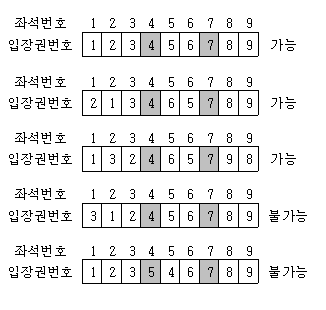

In [35]:
seat_count = 9
vip_seat_array = [4, 7]

[1, 2, 3, 4, 5, 6, 7, 8, 9]

memo = {
    1: 1,
    2: 2
}


def fibo_dynamic_programming(n, fibo_memo):
    if fibo_memo.get(n):
        return fibo_memo[n]
    else:
        fibo_memo[n] = fibo_dynamic_programming(n-2, fibo_memo) + fibo_dynamic_programming(n-1, fibo_memo)
    return fibo_memo[n]


def get_all_ways_of_theater_seat(total_count, fixed_seat_array):
    total_ways = 1
    seats = list(range(1, total_count+1))
    start_idx = 0
    for seat_idx in fixed_seat_array:
        total_ways *= fibo_dynamic_programming(len(seats[start_idx:seat_idx-1]), memo)
        start_idx = seat_idx
    if start_idx < seats[-1]:
        total_ways *= fibo_dynamic_programming(len(seats[start_idx:]), memo)
    return total_ways


# 12가 출력되어야 합니다!
print(get_all_ways_of_theater_seat(seat_count, vip_seat_array))

12


#### 모범답안

```python
seat_count = 9
vip_seat_array = [4, 7]

# 예전에 만들었던 fibo_dynamic_programming 에서 가져오면 됩니다!
memo = {
    1: 1,  # 이 문제에서는 Fibo(1) = 1, Fibo(2) = 2 로 시작합니다!
    2: 2
}


def fibo_dynamic_programming(n, fibo_memo):
    if n in fibo_memo:
        return fibo_memo[n]

    nth_fibo = fibo_dynamic_programming(n - 1, fibo_memo) + fibo_dynamic_programming(n - 2, fibo_memo)
    fibo_memo[n] = nth_fibo
    return nth_fibo


def get_all_ways_of_theater_seat(total_count, fixed_seat_array):
    all_ways = 1
    current_index = 0
    for fixed_seat in fixed_seat_array:
        fixed_seat_index = fixed_seat - 1
        count_of_ways = fibo_dynamic_programming(fixed_seat_index - current_index, memo)
        all_ways *= count_of_ways
        current_index = fixed_seat_index + 1

    count_of_ways = fibo_dynamic_programming(total_count - current_index, memo)
    all_ways *= count_of_ways
    return all_ways


# 12가 출력되어야 합니다!
print(get_all_ways_of_theater_seat(seat_count, vip_seat_array))
```

In [26]:
len([8, 9])

2

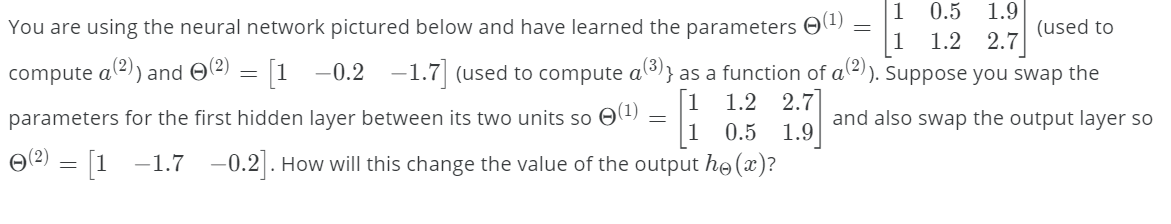

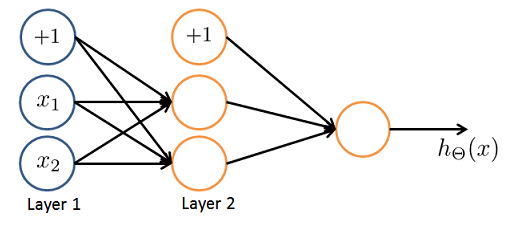

In [ ]:
import numpy as np

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
theta1 = [[1, 0.5, 1.9], [1, 1.2, 2.7]]
theta2 = [1, -0.2, -1.7]

x = [1, 3, 4]

a2 = np.concatenate([[1], sigmoid(np.dot(theta1, x))])
print(a2)
print(np.dot(theta2, a2))
h = sigmoid(np.dot(theta2, a2))

print(h)

[1.         0.99995892 0.99999979]
-0.8999914358373409
0.28905225731623413


In [ ]:
theta1 = [[1, 1.2, 2.7], [1, 0.5, 1.9]]
theta2 = [1, -1.7, -0.2]

x = [1, 3, 4]

a2 = np.concatenate([[1], sigmoid(np.dot(theta1, x))])
print(a2)
print(np.dot(theta2, a2))
h = sigmoid(np.dot(theta2, a2))

print(h)

[1.         0.99999979 0.99995892]
-0.8999914358373409
0.28905225731623413


In [ ]:
h

0.28905225731623413

In [ ]:
np.array(theta2).shape

(3,)

In [ ]:
for i in range(1, 4):
    for j in range(1, 4):
        print(f"a2({i}) + x{j} * Theta1{i, j}")
    print(f"sigmoid(a2({i}))")

a2(1) + x1 * Theta1(1, 1)
a2(1) + x2 * Theta1(1, 2)
a2(1) + x3 * Theta1(1, 3)
sigmoid(a2(1))
a2(2) + x1 * Theta1(2, 1)
a2(2) + x2 * Theta1(2, 2)
a2(2) + x3 * Theta1(2, 3)
sigmoid(a2(2))
a2(3) + x1 * Theta1(3, 1)
a2(3) + x2 * Theta1(3, 2)
a2(3) + x3 * Theta1(3, 3)
sigmoid(a2(3))
